 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix


In [1]:
mars.data <- read.table("~/_Seurat/MARS_Seq.txt", 
    sep = "\t")
smart.data <- read.table("~/_Seurat/SMART_Seq.txt", 
    sep = "\t")

Warning message in file(file, "rt"):
“cannot open file '/Users/dariapodorskaja/_Seurat/MARS_Seq.txt': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [3]:
dim(smart.data)

[1] 3491  813

In [4]:
dim(mars.data)

[1]  3491 10368

In [29]:
# Set up MARS Seq dataset 
mars <- CreateSeuratObject(raw.data = mars.data, project = "MARS_Seq", min.cells = 5)
mars@meta.data$smart <- "MARS"
mars <- FilterCells(mars, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
mars <- NormalizeData(mars)
mars <- ScaleData(mars, display.progress = F)

In [30]:
# Set up Smart Seq dataset
smart <- CreateSeuratObject(raw.data = smart.data, project = "SMART_Seq", min.cells = 5)
smart@meta.data$smart <- "SMART"
smart <- FilterCells(smart, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
smart <- NormalizeData(smart)
smart <- ScaleData(smart, display.progress = F)

In [31]:
#genes.use <- rownames(ctrl)


In [32]:
head(rownames(smart))

NULL

In [33]:
# Gene selection for input to CCA
mars <- FindVariableGenes(mars, do.plot = F)
smart <- FindVariableGenes(smart, do.plot = F)
g.1 <- head(rownames(mars@hvg.info), 1000)
g.2 <- head(rownames(smart@hvg.info), 1000)
genes.use <- unique(c(g.1, g.2))
genes.use <- intersect(genes.use, rownames(mars@scale.data))
genes.use <- intersect(genes.use, rownames(smart@scale.data))

In [34]:
datasets.combined <- RunCCA(mars, smart, genes.use = genes.use, num.cc = 30)

[1] "Scaling data matrix"
  |======================================================================| 100%


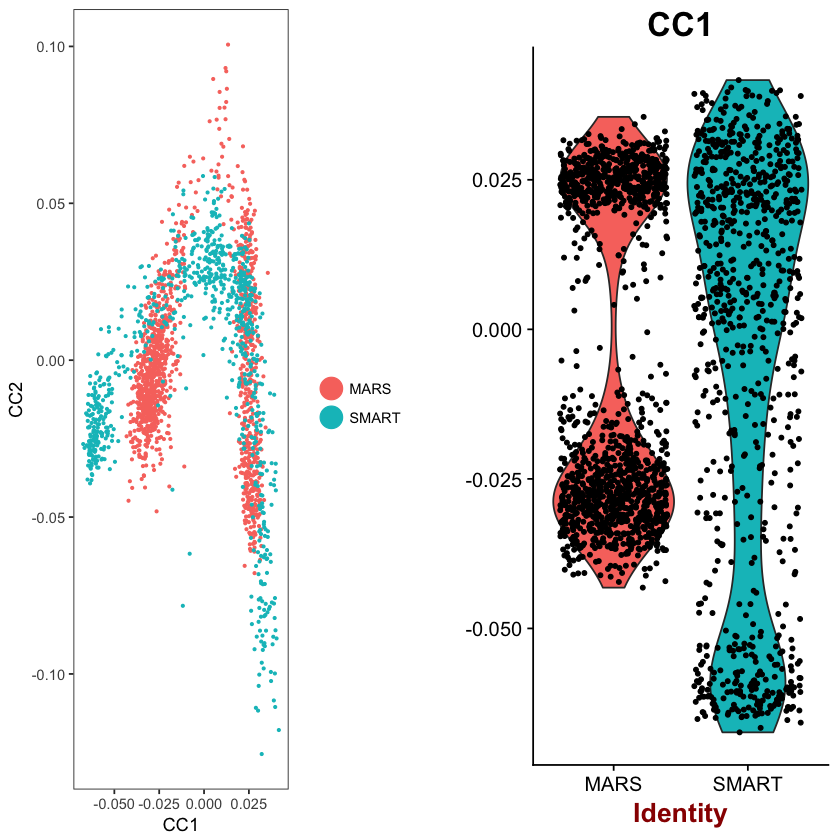

In [35]:
# visualize results of CCA plot CC1 versus CC2 and look at a violin plot
p1 <- DimPlot(object = datasets.combined, reduction.use = "cca", group.by = "smart", 
    pt.size = 0.5, do.return = TRUE)
p2 <- VlnPlot(object = datasets.combined, features.plot = "CC1", group.by = "smart", 
    do.return = TRUE)
plot_grid(p1, p2)

In [36]:
PrintDim(object = datasets.combined,, reduction.type = "cca", dims.print = 1:2, 
    genes.print = 10)

[1] "CC1"
 [1] "ENSMUSG00000040466" "ENSMUSG00000054191" "ENSMUSG00000027562"
 [4] "ENSMUSG00000028644" "ENSMUSG00000004655" "ENSMUSG00000061878"
 [7] "ENSMUSG00000028825" "ENSMUSG00000027556" "ENSMUSG00000004552"
[10] "ENSMUSG00000041329"
[1] ""
 [1] "ENSMUSG00000030707" "ENSMUSG00000017493" "ENSMUSG00000028581"
 [4] "ENSMUSG00000021728" "ENSMUSG00000030220" "ENSMUSG00000040699"
 [7] "ENSMUSG00000026728" "ENSMUSG00000015937" "ENSMUSG00000002204"
[10] "ENSMUSG00000034353"
[1] ""
[1] ""
[1] "CC2"
 [1] "ENSMUSG00000020125" "ENSMUSG00000022584" "ENSMUSG00000035004"
 [4] "ENSMUSG00000031722" "ENSMUSG00000041754" "ENSMUSG00000024681"
 [7] "ENSMUSG00000059498" "ENSMUSG00000001739" "ENSMUSG00000045636"
[10] "ENSMUSG00000032786"
[1] ""
 [1] "ENSMUSG00000020732" "ENSMUSG00000006360" "ENSMUSG00000002985"
 [4] "ENSMUSG00000023828" "ENSMUSG00000041959" "ENSMUSG00000015053"
 [7] "ENSMUSG00000038393" "ENSMUSG00000048376" "ENSMUSG00000044258"
[10] "ENSMUSG00000022824"
[1] ""
[1] ""


`geom_smooth()` using method = 'loess'


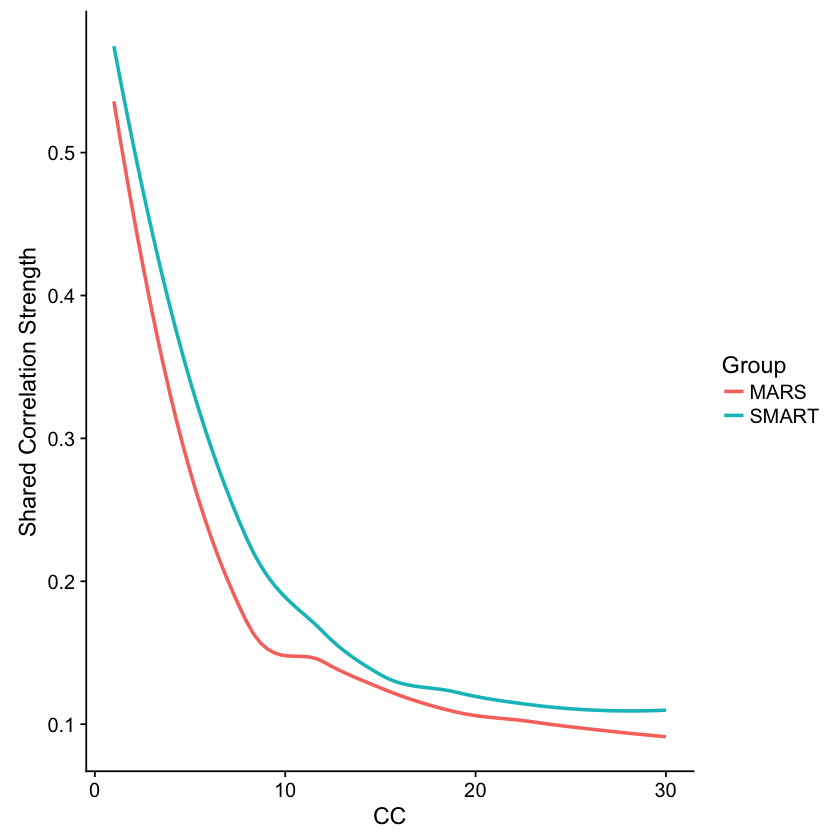

In [37]:
p3 <- MetageneBicorPlot(datasets.combined,, grouping.var = "smart", dims.eval = 1:30, 
    display.progress = FALSE)

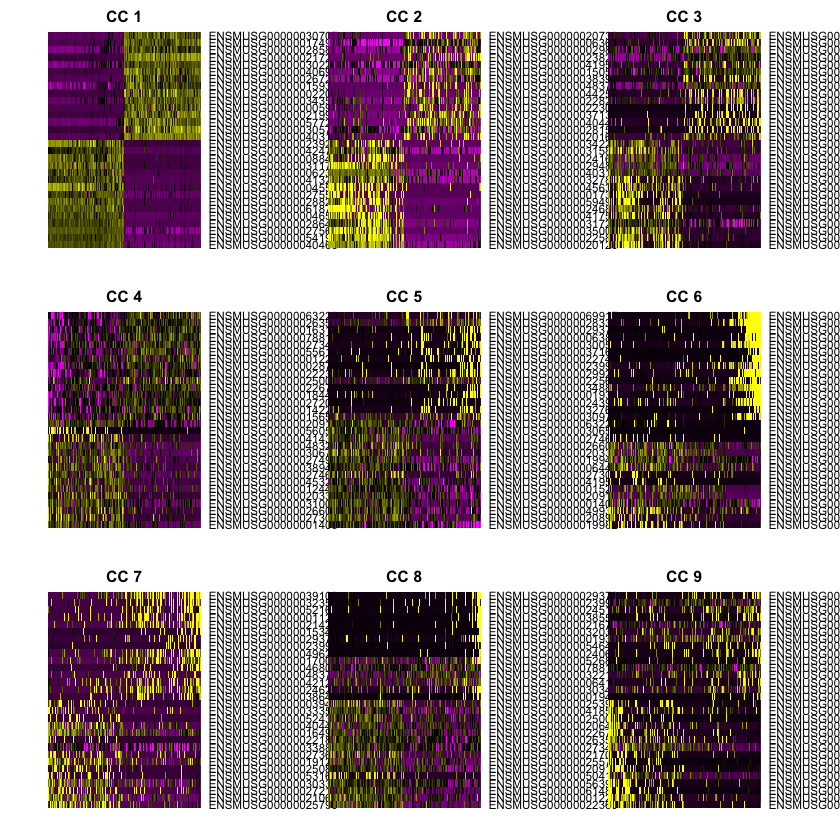

In [38]:
DimHeatmap(object = datasets.combined,, reduction.type = "cca", cells.use = 500, 
    dim.use = 1:9, do.balanced = TRUE)

In [39]:
datasets.combined <- AlignSubspace(datasets.combined, reduction.type = "cca", grouping.var = "smart", 
    dims.align = 1:20)

[1] "Scaling data matrix"
  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


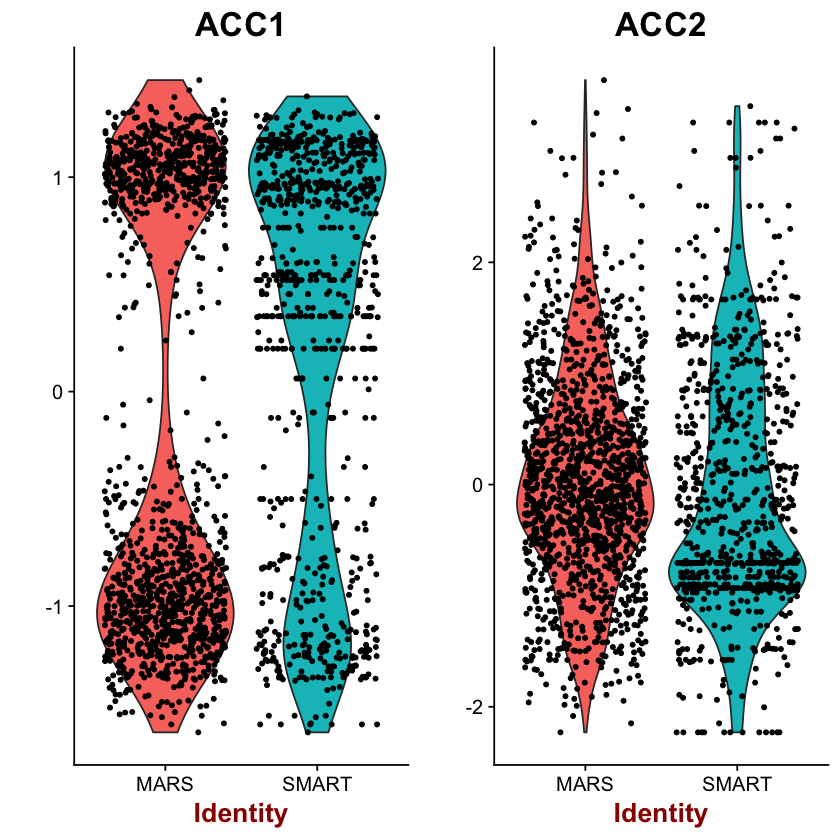

In [40]:
p1 <- VlnPlot(object = datasets.combined, features.plot = "ACC1", group.by = "smart", 
    do.return = TRUE)
p2 <- VlnPlot(object = datasets.combined, features.plot = "ACC2", group.by = "smart", 
    do.return = TRUE)
plot_grid(p1, p2)

In [41]:
# t-SNE and Clustering
datasets.combined <- RunTSNE(datasets.combined, reduction.use = "cca.aligned", dims.use = 1:20, 
    do.fast = T)
datasets.combined <- FindClusters(datasets.combined, reduction.type = "cca.aligned", 
    resolution = 0.6, dims.use = 1:20)

[1] "Constructing SNN"
  |======================================================================| 100%


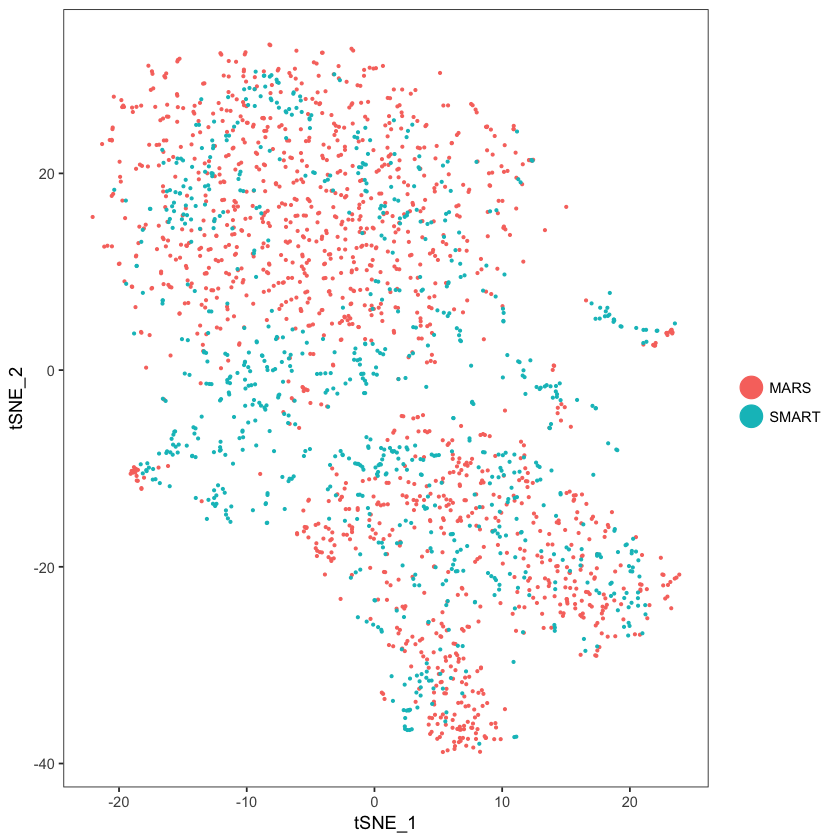

In [42]:
# Visualization
p1 <- TSNEPlot(datasets.combined, do.return = T, pt.size = 0.5, group.by = "smart")
plot_grid(p1)

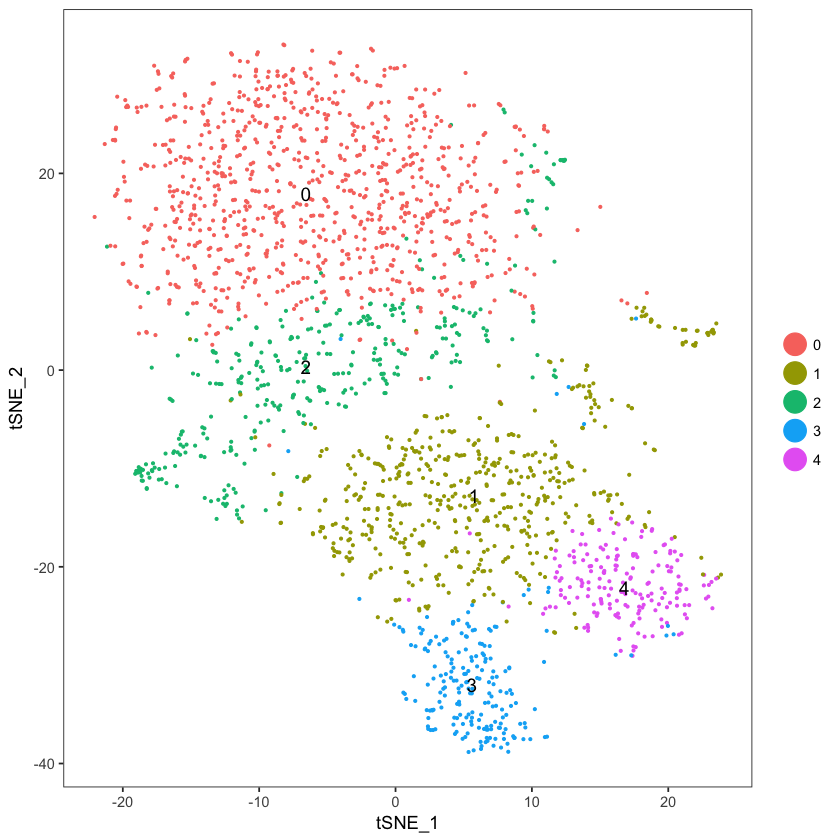

In [43]:
p2 <- TSNEPlot(datasets.combined, do.label = TRUE, do.return = T, pt.size = 0.5)
plot_grid(p2)


In [20]:
cluster1.markers <- FindMarkers(object = datasets.combined, ident.1 = 1, min.pct = 0.25)
print(x = head(x = cluster1.markers, n = 5))

                           p_val avg_logFC pct.1 pct.2     p_val_adj
ENSMUSG00000016494 3.535527e-199  2.059876 0.942 0.457 1.233899e-195
ENSMUSG00000031765 9.931627e-181 -2.098221 0.660 0.977 3.466138e-177
ENSMUSG00000029810 9.275367e-171  1.549537 0.948 0.503 3.237103e-167
ENSMUSG00000027556 2.967116e-166 -3.190674 0.545 0.933 1.035523e-162
ENSMUSG00000021998 5.021701e-161  1.493922 0.955 0.530 1.752574e-157


In [23]:
cluster5.markers <- FindMarkers(object = datasets.combined, ident.1 = 4, ident.2 = c(0, 3), 
    min.pct = 0.25)
print(x = head(x = cluster5.markers, n = 5))

                           p_val avg_logFC pct.1 pct.2     p_val_adj
ENSMUSG00000021423 1.522032e-135  2.467292 0.906 0.151 5.311890e-132
ENSMUSG00000041515 1.035666e-123  3.058852 0.994 0.315 3.614475e-120
ENSMUSG00000021728 1.621284e-102  2.233620 0.994 0.427  5.658282e-99
ENSMUSG00000024621 2.639802e-100  2.132528 0.900 0.254  9.212909e-97
ENSMUSG00000068220  4.783174e-98  2.275334 1.000 0.645  1.669328e-94


In [44]:
markers <- FindAllMarkers(object = datasets.combined, only.pos = TRUE, min.pct = 0.25, 
    thresh.use = 0.25)

In [45]:
markers

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
ENSMUSG00000027562,8.542392e-308,1.8503318,1.000,0.826,2.981295e-304,0,ENSMUSG00000027562
ENSMUSG00000040466,5.370889e-299,1.8486319,0.999,0.661,1.874440e-295,0,ENSMUSG00000040466
ENSMUSG00000028825,1.151732e-296,2.2053412,0.979,0.496,4.019543e-293,0,ENSMUSG00000028825
ENSMUSG00000005161,7.036599e-286,1.2706202,1.000,0.962,2.455773e-282,0,ENSMUSG00000005161
ENSMUSG00000061878,5.715196e-282,2.0259507,0.972,0.503,1.994603e-278,0,ENSMUSG00000061878
ENSMUSG00000024661,2.645167e-273,0.8135591,1.000,0.998,9.231633e-270,0,ENSMUSG00000024661
ENSMUSG00000031762,9.783559e-273,2.0013212,0.991,0.540,3.414462e-269,0,ENSMUSG00000031762
ENSMUSG00000022742,1.622719e-268,1.7486628,0.995,0.678,5.663290e-265,0,ENSMUSG00000022742
ENSMUSG00000054191,1.900318e-266,1.6589354,0.998,0.599,6.632111e-263,0,ENSMUSG00000054191
ENSMUSG00000021361,7.992866e-263,1.2111662,0.997,0.937,2.789510e-259,0,ENSMUSG00000021361


In [24]:
markers %>% group_by(cluster) %>% top_n(2, avg_logFC)

ERROR: Error in markers %>% group_by(cluster) %>% top_n(2, avg_logFC): не могу найти функцию "%>%"


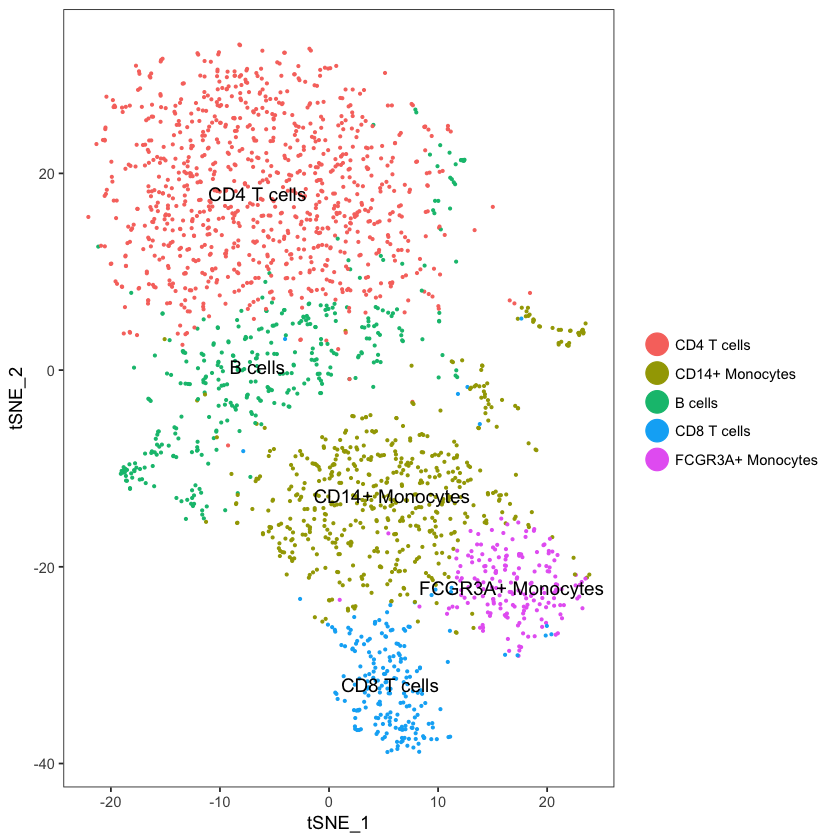

In [25]:
current.cluster.ids <- c(0, 1, 2, 3, 4 )
new.cluster.ids <- c("CD4 T cells", "CD14+ Monocytes", "B cells", "CD8 T cells", 
    "FCGR3A+ Monocytes")
datasets.combined@ident <- plyr::mapvalues(x = datasets.combined@ident, from = current.cluster.ids, to = new.cluster.ids)
TSNEPlot(object = datasets.combined, do.label = TRUE, pt.size = 0.5)

In [41]:
nk.markers <- FindConservedMarkers(datasets.combined, ident.1 = 1, grouping.var = "smart", 
    print.bar = FALSE)
head(nk.markers)

Warning message in if (!ident.use.2 %in% object@ident) {:
“длина условия > 1, будет использован только первый элемент”Warning message in if (!ident.use.2 %in% object@ident) {:
“длина условия > 1, будет использован только первый элемент”

,SMART_p_val,SMART_avg_logFC,SMART_pct.1,SMART_pct.2,SMART_p_val_adj,MARS_p_val,MARS_avg_logFC,MARS_pct.1,MARS_pct.2,MARS_p_val_adj,max_pval,minimump_p_val
ENSMUSG00000042817,9.994128e-43,1.839349,0.963,0.937,3.487951e-39,1.253972e-161,2.486516,0.695,0.030,4.376364e-158,9.994128e-43,2.507945e-161
ENSMUSG00000016494,2.864452e-77,1.769222,0.996,0.988,9.996937e-74,9.289122e-154,2.262378,0.898,0.178,3.241904e-150,2.864452e-77,1.857824e-153
ENSMUSG00000036594,1.410378e-03,0.494173,0.424,0.351,1.000000e+00,3.871872e-145,3.142804,0.647,0.035,1.351283e-141,1.410378e-03,7.743744e-145
ENSMUSG00000024610,3.237857e-04,1.213187,0.609,0.526,1.000000e+00,9.595742e-135,3.097938,0.627,0.041,3.348914e-131,3.237857e-04,1.919148e-134
ENSMUSG00000015937,2.710877e-54,1.131622,1.000,1.000,9.460961e-51,6.036303e-132,1.646247,1.000,0.941,2.106670e-128,2.710877e-54,1.207261e-131
ENSMUSG00000029810,5.036843e-61,1.195691,1.000,0.996,1.757858e-57,6.266373e-129,1.821081,0.905,0.243,2.186964e-125,5.036843e-61,1.253275e-128


In [42]:
FeaturePlot(object = datasets.combined, features.plot = c("GMP", "CMP", "MEP"), min.cutoff = "q9", cols.use = c("lightgrey", 
    "blue"), pt.size = 0.5)

ERROR: Error in FetchData(object = object, vars.all = features.plot, cells.use = cells.use, : Error: GMP not found


In [ ]:
new.ident <- c("GMP", "CMP", "MEP","a","b")
for (i in 0:5) {
    datasets.combined <- RenameIdent(object = datasets.combined, old.ident.name = i, 
        new.ident.name = new.ident[i + 1])
}

TSNEPlot(datasets.combined, do.label = T, pt.size = 0.5)

In [ ]:
new.ident <- c("GMP", "CD4 Naive T", "CD4 Memory T", "B", "CD16 Mono", 
    "T activated", "CD8 T", "NK", "DC", "B activated", "Mk", "pDC", "Eryth")
for (i in 0:12) {
    immune.combined <- RenameIdent(object = immune.combined, old.ident.name = i, 
        new.ident.name = new.ident[i + 1])
}

TSNEPlot(immune.combined, do.label = T, pt.size = 0.5)

In [ ]:
smart1 <- RunPCA(object = smart, pc.genes = smart@var.genes, do.print = TRUE, pcs.print = 1:5, 
    genes.print = 5)

In [ ]:
PCAPlot(object = smart1, dim.1 = 1, dim.2 = 2)
